In [487]:
# Unit 4 Homework Assignment: A Whale Off the Port(folio)

In [488]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [489]:
# Set the path of the CSV files
whale_path = Path("../Pandas Classes/whale_returns.csv")
algo_path = Path("../Pandas Classes/algo_returns.csv")
sp_tsx_path = Path("../Pandas Classes/sp_tsx_history.csv")

# Read in data
whale_returns = pd.read_csv(whale_path, parse_dates=True, infer_datetime_format=True)
algo_returns = pd.read_csv(algo_path, parse_dates=True, infer_datetime_format=True)
sp_tsx_history = pd.read_csv(sp_tsx_path, parse_dates=True, infer_datetime_format=True)

In [490]:
# Reading whale returns
# Count nulls
# Drop nulls

In [491]:
whale_returns

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [492]:
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [493]:
whale_returns = whale_returns.dropna().copy()

In [494]:
whale_returns.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [495]:
# Reading algorithmic returns
# Count nulls
# Drop nulls

In [496]:
algo_returns

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [497]:
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [498]:
algo_returns = algo_returns.dropna().copy()

In [499]:
algo_returns.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [500]:
# Reading S&P TSX 60 Closing Prices
# Check Data Types
# Fix Data Types
# Calculate Daily Returns
# Drop nulls
# Rename `Close` Column to be specific to this portfolio

In [541]:
sp_tsx_history

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"
...,...,...
1813,20-Dec-2019,"$17,118.44"
1814,23-Dec-2019,"$17,128.71"
1815,24-Dec-2019,"$17,180.15"
1816,27-Dec-2019,"$17,168.21"


In [542]:
sp_tsx_history.dtypes

Date     object
Close    object
dtype: object

In [543]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(",","")
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype(float)

/var/folders/9d/rpnbdqqj51b4yqlrbmn011640000gn/T/ipykernel_2591/1775792936.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")


In [544]:
sp_tsx_history.dtypes

Date      object
Close    float64
dtype: object

In [545]:
sp_tsx_history['Date'] = pd.to_datetime(sp_tsx_history.Date).dt.date
whale_returns['Date'] = pd.to_datetime(whale_returns.Date).dt.date
algo_returns['Date'] = pd.to_datetime(algo_returns.Date).dt.date

In [546]:
sp_tsx_history

,Date,Close
0,2012-10-01,12370.19
1,2012-10-02,12391.23
2,2012-10-03,12359.47
3,2012-10-04,12447.68
4,2012-10-05,12418.99
...,...,...
1813,2019-12-20,17118.44
1814,2019-12-23,17128.71
1815,2019-12-24,17180.15
1816,2019-12-27,17168.21


In [547]:
sp_tsx_returns = sp_tsx_history.set_index('Date')
sp_tsx_returns

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [548]:
sp_tsx_returns = sp_tsx_returns.pct_change().dropna().copy()
sp_tsx_returns

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [549]:
sp_tsx_returns.rename(columns = {'Close' : 'S&P TSX'}, inplace = True)
sp_tsx_returns.head()

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [550]:
# Set the date as the Index for whale_returns and algo_returns

In [551]:
whale_returns = whale_returns.set_index('Date')
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [552]:
algo_returns = algo_returns.set_index('Date')
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [553]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

In [562]:
all_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis = 'columns', join = 'inner')

In [566]:
all_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [567]:
# Plot daily returns of all portfolios

<AxesSubplot:title={'center':'Whale Returns'}, xlabel='Date'>

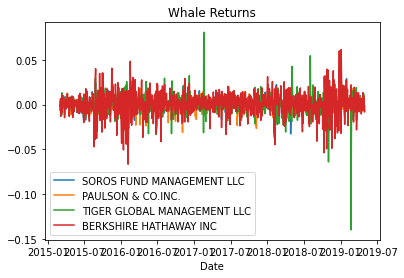

In [576]:
whale_returns.plot(title= 'Whale Returns')

<AxesSubplot:title={'center':'Algorithms Returns'}, xlabel='Date'>

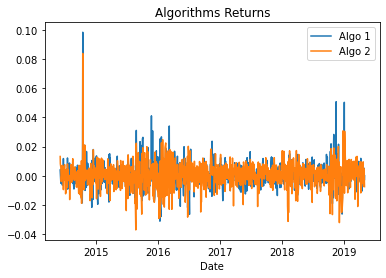

In [575]:
algo_returns.plot(title='Algorithms Returns')

<AxesSubplot:title={'center':'S&P TSX 60'}, xlabel='Date'>

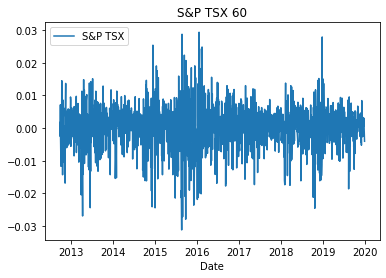

In [574]:
sp_tsx_returns.plot(title= 'S&P TSX 60')

In [577]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns

In [603]:
cumulative_returns = all_returns.sum()
cumulative_returns

SOROS FUND MANAGEMENT LLC      0.145473
PAULSON & CO.INC.             -0.247841
TIGER GLOBAL MANAGEMENT LLC   -0.101903
BERKSHIRE HATHAWAY INC         0.388283
Algo 1                         0.733703
Algo 2                         0.214171
S&P TSX                        0.089163
dtype: float64

<AxesSubplot:title={'center':'Cumulative Returns'}>

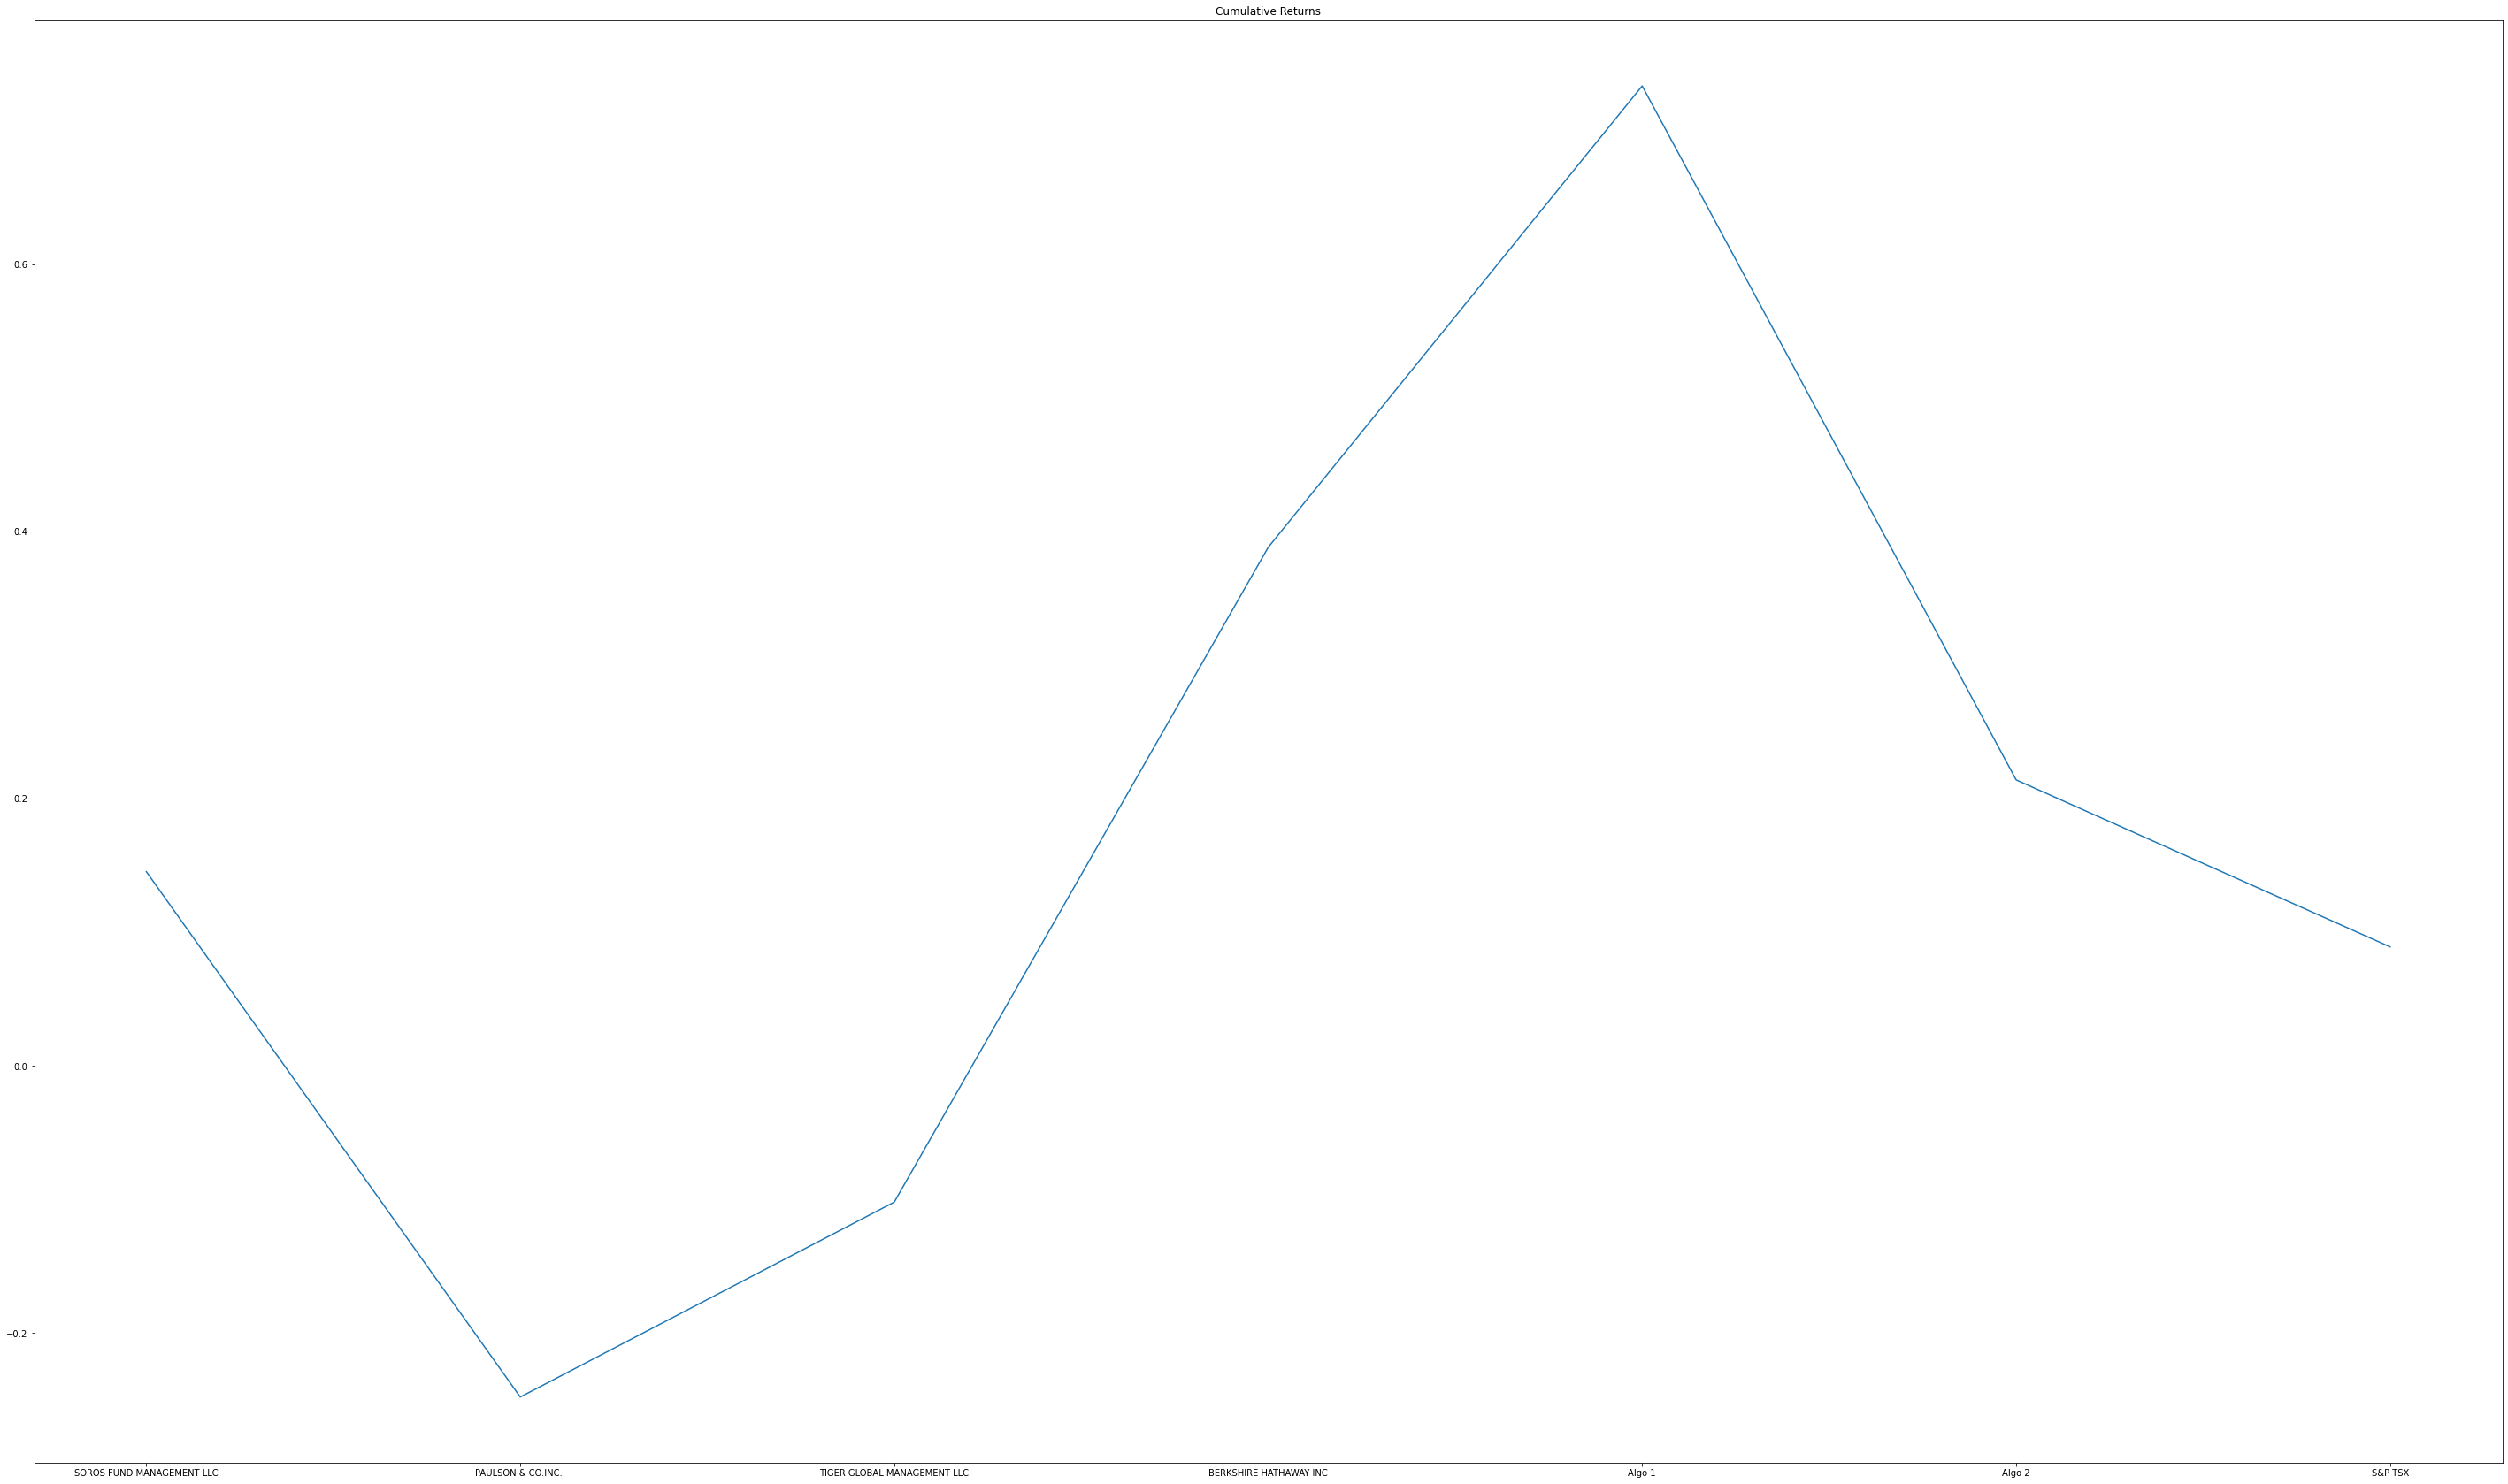

In [584]:
cumulative_returns.plot(figsize=(50,30), title= 'Cumulative Returns')

In [585]:
#Create a box plot for each portfolio. 

<AxesSubplot:>

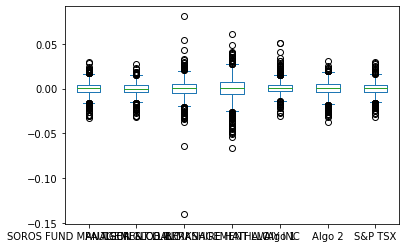

In [587]:
all_returns.plot(kind = 'box')

In [588]:
# Calculate the daily standard deviations of all portfolios

In [589]:
whale_std = whale_returns.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [591]:
algo_std = algo_returns.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [592]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60

In [593]:
sp_tsx_std = sp_tsx_returns.std()
sp_tsx_std

S&P TSX    0.006637
dtype: float64

In [597]:
print(f'Therefore all the portfolios are riskier than S&P TSX 60')

Therefore all the portfolios are riskier than S&P TSX 60


In [598]:
# Calculate the annualized standard deviation (252 trading days)

In [599]:
whale_std * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [600]:
algo_std * np.sqrt(252)

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [604]:
sp_tsx_std * np.sqrt(252)

S&P TSX    0.105365
dtype: float64

In [605]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation

In [608]:
all_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356


<AxesSubplot:xlabel='Date'>

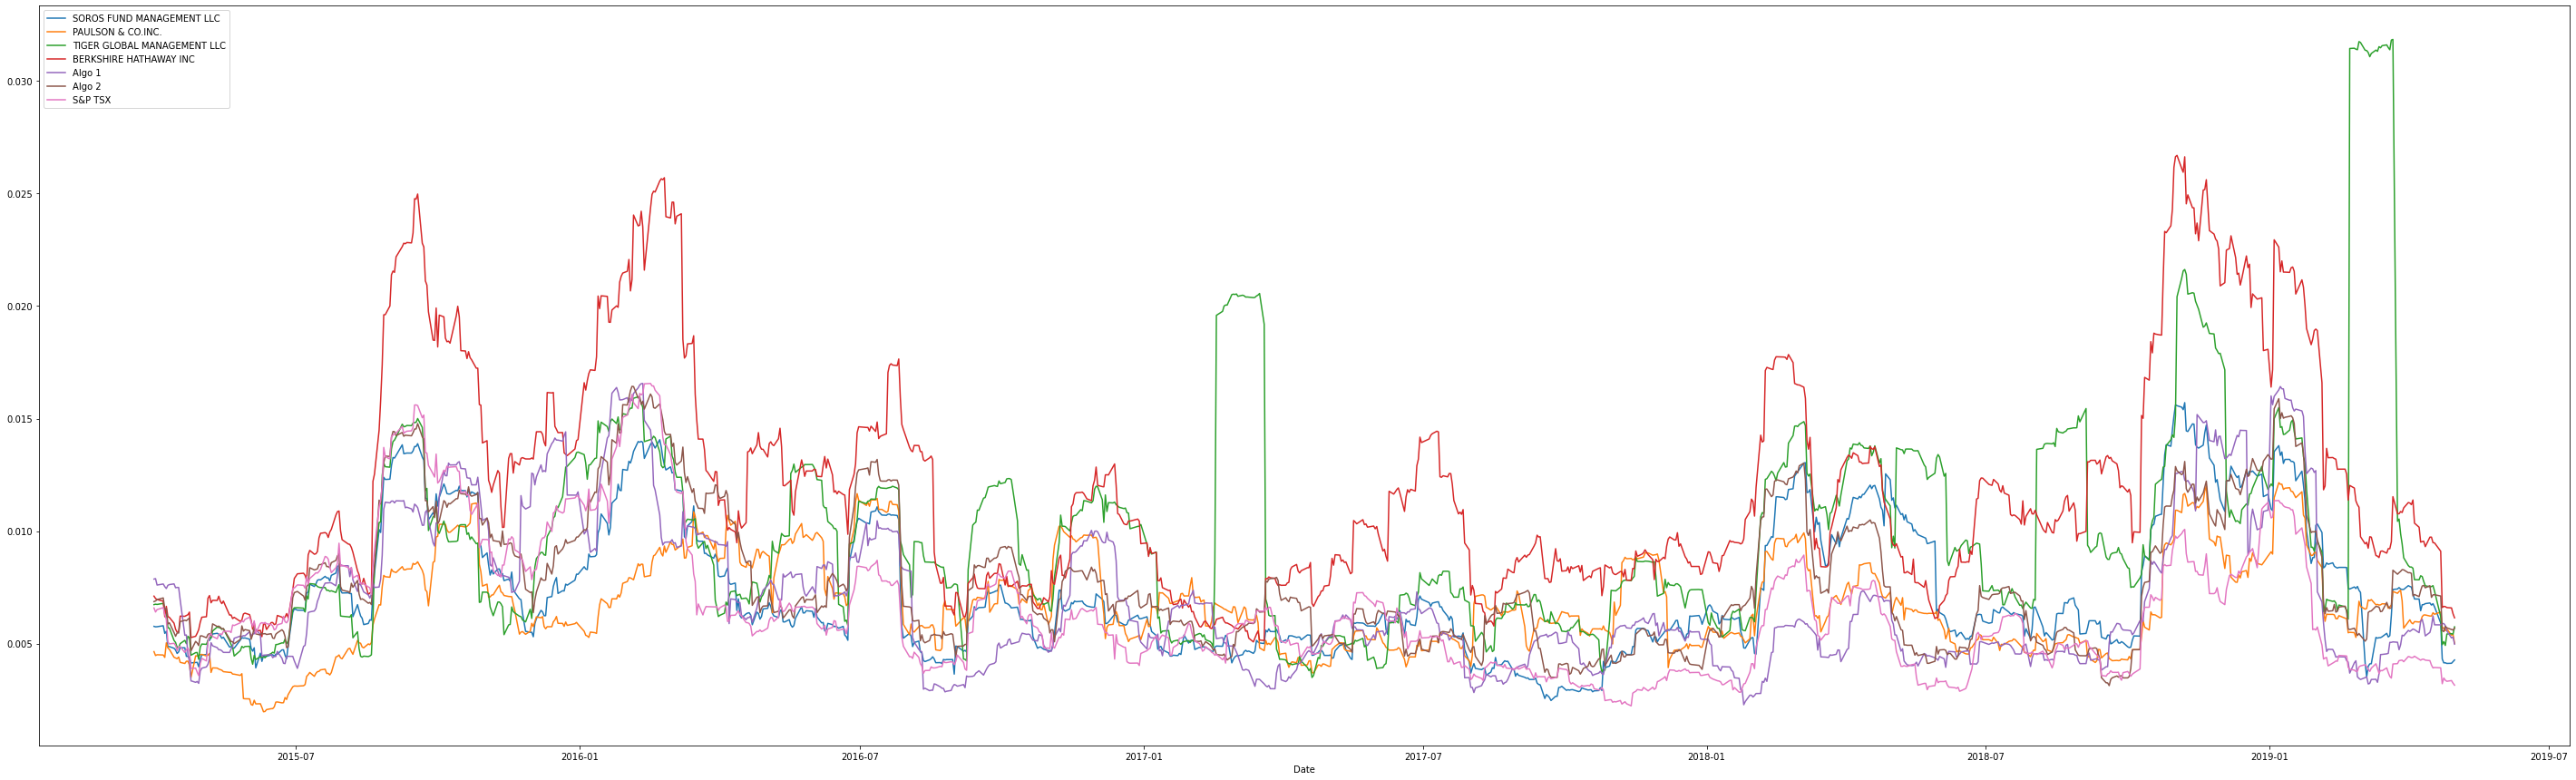

In [613]:
all_returns.rolling(window=21).std().plot(figsize= (50,15))

In [614]:
# Calculate the correlation

# Display de correlation matrix

In [615]:
import seaborn as sns 

In [617]:
correlation = all_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

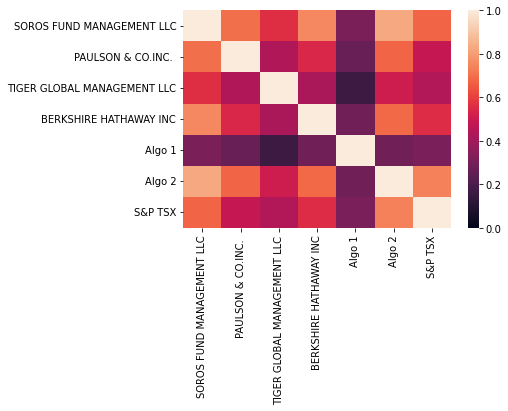

In [618]:
sns.heatmap(correlation, vmin=0, vmax=1) 

In [619]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend

In [642]:
variance = all_returns['S&P TSX'].rolling(window=60).var()
variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [643]:
print(f"I chose the PAULSON & CO.INC portfolio")

I chose the PAULSON & CO.INC portfolio


In [644]:
all_returns.columns = ["SFML", "PCI", "TGML", "BHI", "Algo 1", "Algo 2", "S&P TSX"]
all_returns

,SFML,PCI,TGML,BHI,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [645]:
covariance = all_returns['PCI'].rolling(window=60).cov(all_returns['S&P TSX'])
covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000006
2019-04-26    0.000006
2019-04-29    0.000006
2019-04-30    0.000006
2019-05-01    0.000007
Length: 1029, dtype: float64

In [646]:
beta_PCI = (covariance / variance)
beta_PCI

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.421500
2019-04-26    0.429171
2019-04-29    0.405153
2019-04-30    0.435933
2019-05-01    0.446203
Length: 1029, dtype: float64

<AxesSubplot:xlabel='Date'>

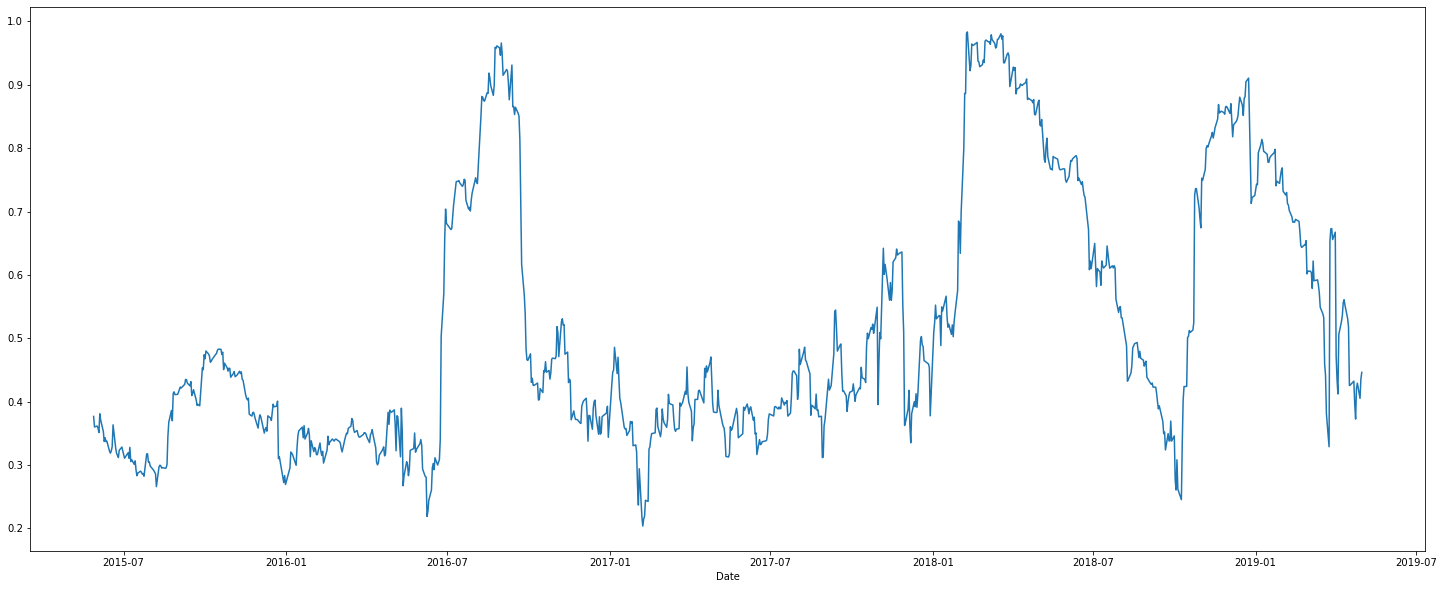

In [651]:
beta_PCI.plot(figsize=(25,10))

In [652]:
# Use `ewm` to calculate the rolling window

In [662]:
all_returns.ewm(com=21).std()

,SFML,PCI,TGML,BHI,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002673,0.004953,0.002487,0.007001,0.004166,0.002658,0.004934
2015-03-06,0.005385,0.004610,0.004696,0.009429,0.003412,0.007217,0.005222
2015-03-09,0.004655,0.004462,0.005541,0.008074,0.002984,0.006320,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006006,0.005867,0.013165,0.009387,0.005845,0.006950,0.004176
2019-04-26,0.006037,0.006049,0.013156,0.009345,0.005736,0.006854,0.004088
2019-04-29,0.005899,0.005930,0.012924,0.009150,0.005691,0.006708,0.004014


In [663]:
# Annualized Sharpe Ratios

In [664]:
sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
sharpe_ratios

SFML       0.286709
PCI       -0.547594
TGML      -0.144455
BHI        0.467045
Algo 1     1.491514
Algo 2     0.396817
S&P TSX    0.195550
dtype: float64

In [665]:
# Visualize the sharpe ratios as a bar plot

<AxesSubplot:title={'center':'Sharpe Ratios'}>

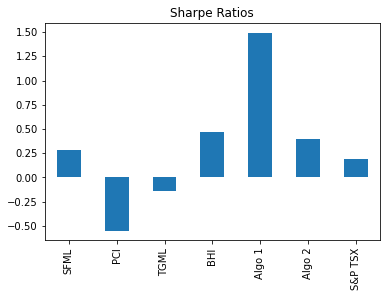

In [668]:
sharpe_ratios.plot(kind='bar', title= 'Sharpe Ratios')

In [670]:
print(f'Therefore the final analysis shows that Algo 1 outperforms the market and all the whale portfolios; while Algo 2 outperforms the market and outperforms 3/4 whale portfolios.')

Therefore the final analysis shows that Algo 1 outperforms the market and all the whale portfolios; while Algo 2 outperforms the market and outperforms 3/4 whale portfolios.
